## Import

In [63]:
# Importing the libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset

url = 'https://raw.githubusercontent.com/liliansom/ML_CustomerSatisfaction/main/data/Invistico_Airline_treated.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,Unnamed: 0,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,0,0,65,1,1,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,1,0,47,1,0,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,2,1,0,0,15,1,1,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,3,1,0,0,60,1,1,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,4,1,0,0,70,1,1,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## Model 1

In [4]:
# Selecting the variables that will be used at this model
new_data = data[['Inflight entertainment', 
                'Ease of Online booking', 
                'On-board service', 
                'Online support', 
                'Leg room service', 
                'Online boarding',
                'Checkin service',
                'Baggage handling',
                'Cleanliness',
                'Seat comfort',
                'Inflight wifi service',
                 'Gender',
                 'Class',
                 'Customer Type'
                ]]

caracteristicas = new_data
previsor = data['satisfaction']

In [5]:
# Spliting the dataset: 80% for train and 10% for test

X_train, X_test, y_train, y_test = train_test_split(caracteristicas, previsor, test_size=0.10, shuffle=True)

In [6]:
# Instantiating the model

f_log = LogisticRegression()

In [7]:
f_log.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Predicting with the model
previsoes = f_log.predict(X_test)
previsoes

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [9]:
y_previsto_train = f_log.predict(X_train)

## Analysis of the Model

### Confusion Matrix
A confusion matrix is a performance measurement tool used in machine learning to evaluate the accuracy of a classification model. It is a table that visualizes the performance of a model by comparing the actual labels of a dataset with the predicted labels generated by the model.

The confusion matrix consists of four key components:

1) True Positive (TP): The number of observations that are correctly predicted as positive or belonging to the positive class.

2) True Negative (TN): The number of observations that are correctly predicted as negative or belonging to the negative class.

3) False Positive (FP): The number of observations that are incorrectly predicted as positive when they actually belong to the negative class. Also known as a Type I error.

4) False Negative (FN): The number of observations that are incorrectly predicted as negative when they actually belong to the positive class. Also known as a Type II error.

### Classification Report
A classification report is a summary of the performance metrics for a classification model. It provides a comprehensive evaluation of the model's predictive ability for each class in a multi-class classification problem.

The classification report typically includes the following metrics for each class:

Precision: It measures the proportion of true positive predictions among all positive predictions. It indicates how well the model correctly identifies positive instances for a given class.

Recall: Also known as sensitivity or true positive rate, it measures the proportion of true positive predictions among all actual positive instances. It indicates the model's ability to correctly identify positive instances for a given class.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance, taking into account both precision and recall. It is often used as a single metric to evaluate the model's overall performance.

Support: Support refers to the number of occurrences of each class in the test dataset. It provides insights into the distribution of instances across different classes.

The classification report helps in understanding the strengths and weaknesses of the model for each class and can be useful in making decisions regarding model optimization or class-specific performance improvements.

In [10]:
confusion_matrix(y_test, previsoes)

array([[4713, 1173],
       [1131, 5971]], dtype=int64)

In [11]:
print(classification_report(y_test, previsoes))
# recall = acertividade

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      5886
           1       0.84      0.84      0.84      7102

    accuracy                           0.82     12988
   macro avg       0.82      0.82      0.82     12988
weighted avg       0.82      0.82      0.82     12988



## Model 2 - Balanced dataset

In [12]:
# Identifique a coluna específica em que você deseja igualar os valores 0 e 1
coluna_alvo = 'satisfaction'

# Separe as linhas com valor 0 e 1 em DataFrames diferentes
dados_0 = data[data[coluna_alvo] == 0]
dados_1 = data[data[coluna_alvo] == 1]

# Obtenha o número mínimo de linhas entre os dois DataFrames
minimo_linhas = min(len(dados_0), len(dados_1))

# Amostra aleatória das linhas com valor 0
dados_0_subamostrados = dados_0.sample(n=minimo_linhas, random_state=42)

# Amostra aleatória das linhas com valor 1
dados_1_subamostrados = dados_1.sample(n=minimo_linhas, random_state=42)

# Concatene os DataFrames subamostrados de volta em um único DataFrame
data_balanceado = pd.concat([dados_0_subamostrados, dados_1_subamostrados])

# Embaralhe as linhas do DataFrame resultante
data_bal = data_balanceado.sample(frac=1, random_state=42)


In [13]:
data_bal['satisfaction'].value_counts()

1    58793
0    58793
Name: satisfaction, dtype: int64

In [14]:
# Selecting the variables that will be used at this model
new_data1 = data_bal[['Inflight entertainment', 
                'Ease of Online booking', 
                'On-board service', 
                'Online support', 
                'Leg room service', 
                'Online boarding',
                'Checkin service',
                'Baggage handling',
                'Cleanliness',
                'Seat comfort',
                'Inflight wifi service',
                 'Gender',
                 'Class',
                 'Customer Type',
                 
                ]]

caracteristicas1 = new_data1
previsor1 = data_bal['satisfaction']

In [15]:
# Spliting the dataset: 80% for train and 20% for test
X_train1, X_test1, y_train1, y_test1 = train_test_split(caracteristicas1, previsor1, test_size=0.10, shuffle=True)

In [16]:
# Instantiating the model
f_log1 = LogisticRegression()

In [17]:
f_log1.fit(X_train1, y_train1)

LogisticRegression()

In [18]:
# Predicting with the model
previsoes1 = f_log1.predict(X_test1)
previsoes1

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [19]:
y_previsto_train1 = f_log1.predict(X_train1)

## Analysing the Model

### Confusion Matrix


In [20]:
confusion_matrix(y_test1, previsoes1)

array([[4984,  966],
       [1052, 4757]], dtype=int64)

### Classification Report

In [21]:
print(classification_report(y_test1, previsoes1))
# recall = acertividade

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      5950
           1       0.83      0.82      0.83      5809

    accuracy                           0.83     11759
   macro avg       0.83      0.83      0.83     11759
weighted avg       0.83      0.83      0.83     11759



new_data1 = data[['Customer Type', 'Gender', 'Class', 'Seat comfort',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']]

# Model 3 - More variables

In [51]:
# Selecting the variables that will be used at this model
new_data2 = data_bal[['Inflight entertainment', 
                'Ease of Online booking', 
                'On-board service', 
                'Online support', 
                'Leg room service', 
                'Online boarding',
                'Checkin service',
                'Baggage handling',
                'Cleanliness',
                'Seat comfort',
                'Inflight wifi service',
                 'Gender',
                 'Class',
                 'Customer Type'                 
                ]]

caracteristicas2 = new_data2
previsor2 = data_bal['satisfaction']

In [52]:
# Spliting the dataset: 80% for train and 20% for test
X_train2, X_test2, y_train2, y_test2 = train_test_split(caracteristicas2, previsor2, test_size=0.10, shuffle=True)

In [80]:
print("{},{},{},{}".format(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape))


(105827, 14),(11759, 14),(105827,),(11759,)


In [94]:
# Criar a matriz de dados específica do XGBoost
dados_treino = xgb.DMatrix(X_train2, label=y_train2)

In [95]:
# Definir os parâmetros do modelo
parametros = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

In [96]:
# Treinar o modelo
xgb_model = xgb.train(parametros, dados_treino, num_boost_round=100)

In [97]:
# Prever os rótulos do conjunto de teste
dados_teste = xgb.DMatrix(X_test2)
predicoes = xgb_model.predict(dados_teste)

In [98]:
# Arredondar as predições para obter rótulos binários
predicoes_binarias = [round(valor) for valor in predicoes]

# Analysing the Model

In [99]:
# Avaliar a precisão do modelo
precisao = accuracy_score(y_test2, predicoes_binarias)
print("Precisão: %.2f%%" % (precisao * 100.0))

Precisão: 91.05%


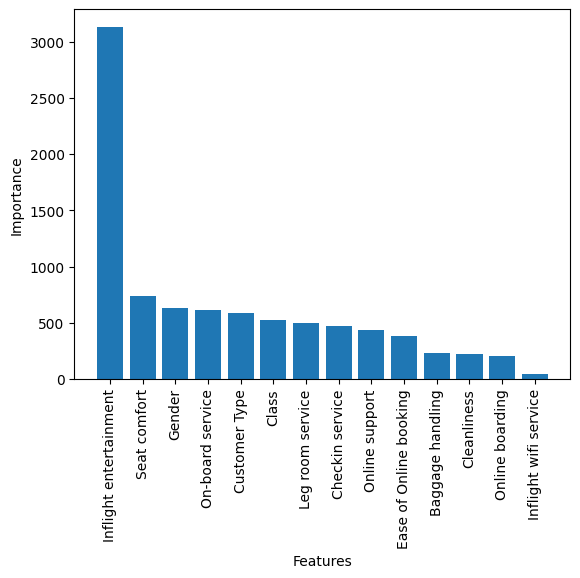

In [100]:
# Obter a importância das features no modelo treinado
feature_importance = xgb_model.get_score(importance_type="gain")

# Ordenar as features pela importância
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Separar as features e suas importâncias
features = [x[0] for x in sorted_feature_importance]
importances = [x[1] for x in sorted_feature_importance]

# Plotar a importância das features
plt.bar(features, importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()


In [103]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

# Calcule a matriz de confusão
confusion_mtx = confusion_matrix(y_test2, predicoes_binarias)
print("Matriz de Confusão:")
print(confusion_mtx)


Matriz de Confusão:
[[5426  492]
 [ 560 5281]]


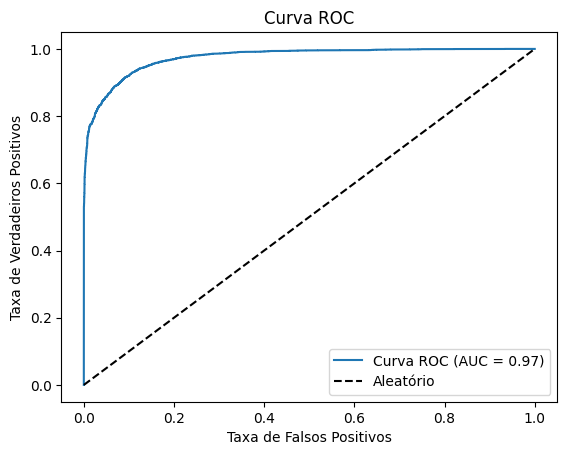

In [113]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Converter os dados de teste em um DMatrix
dtest = xgb.DMatrix(X_test2)

# Obter as previsões do modelo (valores de score)
y_scores = xgb_model.predict(dtest)

# Aplicar a função de transformação sigmoid para obter as probabilidades
y_prob = 1 / (1 + np.exp(-y_scores))

# Calcular a taxa de falsos positivos, taxa de verdadeiros positivos e limiares
fpr, tpr, thresholds = roc_curve(y_test2, y_prob)

# Calcular a área sob a curva ROC
auc = roc_auc_score(y_test2, y_prob)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


In [117]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Crie um objeto estimador XGBoost
xgb_model = xgb.XGBClassifier()

# Realize a validação cruzada com 5 folds
cv_scores = cross_val_score(xgb_model, X_train2, y_train2, cv=5)

print("Pontuações da validação cruzada:", cv_scores)
print("Precisão média da validação cruzada:", cv_scores.mean())


Pontuações da validação cruzada: [0.94136823 0.94023434 0.94306638 0.94065674 0.94448382]
Precisão média da validação cruzada: 0.9419619031176929


## Saving the model to test it

In [118]:
#pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))